# financial and economic data applications


In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(30, 10))

In [2]:
%matplotlib inline

## Data Munging topics

### Time Series and cross section alignment


In [3]:
close_px = pd.read_csv('ch11/stock_px.csv', parse_dates=True, index_col=0)
volume = pd.read_csv('ch11/volume.csv', parse_dates=True, index_col=0)
prices = close_px.ix['2011-09-05':'2011-09-14', ['AAPL', 'JNJ', 'SPX', 'XOM']]
volume = volume.ix['2011-09-05':'2011-09-12', ['AAPL', 'JNJ', 'XOM']]

In [4]:
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [5]:
volume

,AAPL,JNJ,XOM
2011-09-06,18173500.0,15848300.0,25416300.0
2011-09-07,12492000.0,10759700.0,23108400.0
2011-09-08,14839800.0,15551500.0,22434800.0
2011-09-09,20171900.0,17008200.0,27969100.0
2011-09-12,16697300.0,13448200.0,26205800.0


In [6]:
prices * volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


In [7]:
vwap = (prices * volume).sum()/volume.sum()
vwap


AAPL    380.655181
JNJ      64.394769
SPX            NaN
XOM      72.024288
dtype: float64

In [8]:
vwap.dropna()

AAPL    380.655181
JNJ      64.394769
XOM      72.024288
dtype: float64

In [9]:
prices.align(volume, join='inner')

(              AAPL    JNJ    XOM
 2011-09-06  379.74  64.64  71.15
 2011-09-07  383.93  65.43  73.65
 2011-09-08  384.14  64.95  72.82
 2011-09-09  377.48  63.64  71.01
 2011-09-12  379.94  63.59  71.84,
                   AAPL         JNJ         XOM
 2011-09-06  18173500.0  15848300.0  25416300.0
 2011-09-07  12492000.0  10759700.0  23108400.0
 2011-09-08  14839800.0  15551500.0  22434800.0
 2011-09-09  20171900.0  17008200.0  27969100.0
 2011-09-12  16697300.0  13448200.0  26205800.0)

In [10]:
s1 = Series(range(3), index=['a', 'b', 'c'])
s2 = Series(range(4), index=['d', 'b', 'c', 'e'])
s3 = Series(range(3), index=['f', 'a', 'c'])
DataFrame({'one': s1, 'two': s2, 'three': s3})

,one,three,two
a,0.0,1.0,NaN
b,1.0,NaN,1.0
c,2.0,2.0,2.0
d,NaN,NaN,0.0
e,NaN,NaN,3.0
f,NaN,0.0,NaN


In [11]:
DataFrame({'one': s1, 'two': s2, 'three': s3}, index=list('face'))

,one,three,two
f,NaN,0.0,NaN
a,0.0,1.0,NaN
c,2.0,2.0,2.0
e,NaN,NaN,3.0


### Operations with time series of different frequencies

In [12]:
ts1 = Series(np.random.randn(3),
            index= pd.date_range('2016-8-16', periods=3, freq='W-WED'))
ts1

2016-08-17   -2.857761
2016-08-24    0.713030
2016-08-31    0.400330
Freq: W-WED, dtype: float64

In [13]:
ts1.resample('B').mean()

2016-08-17   -2.857761
2016-08-18         NaN
2016-08-19         NaN
2016-08-22         NaN
2016-08-23         NaN
2016-08-24    0.713030
2016-08-25         NaN
2016-08-26         NaN
2016-08-29         NaN
2016-08-30         NaN
2016-08-31    0.400330
Freq: B, dtype: float64

In [14]:
ts1.resample('B').ffill()

2016-08-17   -2.857761
2016-08-18   -2.857761
2016-08-19   -2.857761
2016-08-22   -2.857761
2016-08-23   -2.857761
2016-08-24    0.713030
2016-08-25    0.713030
2016-08-26    0.713030
2016-08-29    0.713030
2016-08-30    0.713030
2016-08-31    0.400330
Freq: B, dtype: float64

In [15]:
dates = pd.DatetimeIndex(['2016-8-16','2016-8-17', '2016-8-19', '2016-8-22', '2016-8-23', '2016-8-25'])
ts2 = Series(np.random.randn(6),index=dates)
ts2

2016-08-16    0.846747
2016-08-17   -1.445991
2016-08-19   -0.285607
2016-08-22   -1.082197
2016-08-23    1.339253
2016-08-25    0.581464
dtype: float64

In [16]:
ts1.reindex(ts2.index,method='ffill')

2016-08-16         NaN
2016-08-17   -2.857761
2016-08-19   -2.857761
2016-08-22   -2.857761
2016-08-23   -2.857761
2016-08-25    0.713030
dtype: float64

In [17]:
ts2 + ts1.reindex(ts2.index,method='ffill')

2016-08-16         NaN
2016-08-17   -4.303752
2016-08-19   -3.143368
2016-08-22   -3.939958
2016-08-23   -1.518508
2016-08-25    1.294494
dtype: float64

#### using periods instead of timestamp

In [18]:
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
             index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
infl = Series([0.025, 0.045, 0.037, 0.04],
              index=pd.period_range('1982', periods=4, freq='A-DEC'))
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [19]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

In [20]:
infl_q =infl.asfreq('Q-SEP',how='end')
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [21]:
infl_q.reindex(gdp.index, method='ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

### time of day and 'as of' data selection

In [22]:
# Make an intraday date range and time series
rng = pd.date_range('2016-08-01 09:30', '2016-08-01 15:59', freq='T')
# Make a 5-day series of 9:30-15:59 values
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
ts = Series(np.arange(len(rng), dtype=float), index=rng)
ts

2016-08-01 09:30:00       0.0
2016-08-01 09:31:00       1.0
2016-08-01 09:32:00       2.0
2016-08-01 09:33:00       3.0
2016-08-01 09:34:00       4.0
2016-08-01 09:35:00       5.0
                        ...  
2016-08-04 15:54:00    1554.0
2016-08-04 15:55:00    1555.0
2016-08-04 15:56:00    1556.0
2016-08-04 15:57:00    1557.0
2016-08-04 15:58:00    1558.0
2016-08-04 15:59:00    1559.0
dtype: float64

In [23]:
from datetime import time
ts[time(10,0)]

2016-08-01 10:00:00      30.0
2016-08-02 10:00:00     420.0
2016-08-03 10:00:00     810.0
2016-08-04 10:00:00    1200.0
dtype: float64

In [24]:
ts.at_time(time(10,0))

2016-08-01 10:00:00      30.0
2016-08-02 10:00:00     420.0
2016-08-03 10:00:00     810.0
2016-08-04 10:00:00    1200.0
dtype: float64

In [25]:
ts.between_time(time(10,0), time(10,1))

2016-08-01 10:00:00      30.0
2016-08-01 10:01:00      31.0
2016-08-02 10:00:00     420.0
2016-08-02 10:01:00     421.0
2016-08-03 10:00:00     810.0
2016-08-03 10:01:00     811.0
2016-08-04 10:00:00    1200.0
2016-08-04 10:01:00    1201.0
dtype: float64

In [26]:
indexer = np.sort(np.random.permutation(len(ts))[700:])
irr_ts = ts.copy()
irr_ts[indexer] = np.nan


In [27]:
irr_ts['2016-08-01 09:50':'2016-08-01 11:00']

2016-08-01 09:50:00    20.0
2016-08-01 09:51:00     NaN
2016-08-01 09:52:00    22.0
2016-08-01 09:53:00     NaN
2016-08-01 09:54:00    24.0
2016-08-01 09:55:00     NaN
                       ... 
2016-08-01 10:55:00     NaN
2016-08-01 10:56:00    86.0
2016-08-01 10:57:00     NaN
2016-08-01 10:58:00     NaN
2016-08-01 10:59:00     NaN
2016-08-01 11:00:00     NaN
dtype: float64

In [28]:
selection = pd.date_range('2016-08-01 10:00', periods=4, freq='B')
irr_ts.asof(selection)

2016-08-01 10:00:00      30.0
2016-08-02 10:00:00     420.0
2016-08-03 10:00:00     810.0
2016-08-04 10:00:00    1193.0
Freq: B, dtype: float64

### splicing together data sources


In [29]:
data1 = DataFrame(np.ones((6, 3), dtype=float),
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('8/16/2016', periods=6))
data2 = DataFrame(np.ones((6, 3), dtype=float) * 2,
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('8/17/2016', periods=6))
spliced = pd.concat([data1.ix[:'2016-08-18'], data2.ix['2016-08-19':]])
spliced

,a,b,c
2016-08-16,1.0,1.0,1.0
2016-08-17,1.0,1.0,1.0
2016-08-18,1.0,1.0,1.0
2016-08-19,2.0,2.0,2.0
2016-08-20,2.0,2.0,2.0
2016-08-21,2.0,2.0,2.0
2016-08-22,2.0,2.0,2.0


In [30]:
data2 = DataFrame(np.ones((6, 4), dtype=float) * 2,
                  columns=['a', 'b', 'c', 'd'],
                  index=pd.date_range('8/17/2016', periods=6))
spliced = pd.concat([data1.ix[:'2016-08-18'], data2.ix['2016-08-19':]])
spliced

,a,b,c,d
2016-08-16,1.0,1.0,1.0,NaN
2016-08-17,1.0,1.0,1.0,NaN
2016-08-18,1.0,1.0,1.0,NaN
2016-08-19,2.0,2.0,2.0,2.0
2016-08-20,2.0,2.0,2.0,2.0
2016-08-21,2.0,2.0,2.0,2.0
2016-08-22,2.0,2.0,2.0,2.0


In [31]:
spliced_filled = spliced.combine_first(data2)
spliced_filled

,a,b,c,d
2016-08-16,1.0,1.0,1.0,NaN
2016-08-17,1.0,1.0,1.0,2.0
2016-08-18,1.0,1.0,1.0,2.0
2016-08-19,2.0,2.0,2.0,2.0
2016-08-20,2.0,2.0,2.0,2.0
2016-08-21,2.0,2.0,2.0,2.0
2016-08-22,2.0,2.0,2.0,2.0


In [32]:
spliced.update(data2, overwrite=False)
spliced

,a,b,c,d
2016-08-16,1.0,1.0,1.0,NaN
2016-08-17,1.0,1.0,1.0,2.0
2016-08-18,1.0,1.0,1.0,2.0
2016-08-19,2.0,2.0,2.0,2.0
2016-08-20,2.0,2.0,2.0,2.0
2016-08-21,2.0,2.0,2.0,2.0
2016-08-22,2.0,2.0,2.0,2.0


In [33]:
cp_spliced = spliced.copy()
cp_spliced[['a','c']] = data1[['a','c']]
cp_spliced

,a,b,c,d
2016-08-16,1.0,1.0,1.0,NaN
2016-08-17,1.0,1.0,1.0,2.0
2016-08-18,1.0,1.0,1.0,2.0
2016-08-19,1.0,2.0,1.0,2.0
2016-08-20,1.0,2.0,1.0,2.0
2016-08-21,1.0,2.0,1.0,2.0
2016-08-22,NaN,2.0,NaN,2.0


### Return indexes and cumulative returns

In [34]:
import pandas_datareader.data as web
#import pandas.io.data as web
price = web.DataReader('AAPL','yahoo','2016-01-01')['Adj Close']
price[-5:]

Date
2016-08-10    108.000000
2016-08-11    107.930000
2016-08-12    108.180000
2016-08-15    109.480003
2016-08-16    109.379997
Name: Adj Close, dtype: float64

In [35]:
price['2016-8-03'] / price['2016-3-01'] - 1

0.05872972499158835

In [36]:
returns = price.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[0] = 1 #set first value to 1
ret_index

Date
2016-01-04    1.000000
2016-01-05    0.974941
2016-01-06    0.955861
2016-01-07    0.915520
2016-01-08    0.920361
2016-01-11    0.935263
                ...   
2016-08-09    1.050430
2016-08-10    1.042610
2016-08-11    1.041934
2016-08-12    1.044348
2016-08-15    1.056898
2016-08-16    1.055932
Name: Adj Close, dtype: float64

In [37]:
m_returns = ret_index.resample('BM').last().pct_change()
m_returns['2016']

Date
2016-01-29         NaN
2016-02-29   -0.001288
2016-03-31    0.127211
2016-04-29   -0.139921
2016-05-31    0.071773
2016-06-30   -0.042660
2016-07-29    0.090063
2016-08-31    0.055297
Freq: BM, Name: Adj Close, dtype: float64

In [38]:
m_rets = (1 + returns).resample('M', kind='period').prod() - 1 
m_rets['2016']

Date
2016-01   -0.076032
2016-02   -0.001288
2016-03    0.127211
2016-04   -0.139921
2016-05    0.071773
2016-06   -0.042660
2016-07    0.090063
2016-08    0.055297
Freq: M, Name: Adj Close, dtype: float64

## Group transforms and analysis

In [39]:
import random; random.seed(0)
import string
N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in xrange(n)])
tickers = np.array([rands(5) for _ in xrange(N)])
##Dataframe
M = 500
df = DataFrame({'Momentum' : np.random.randn(M) / 200 + 0.03,
                'Value' : np.random.randn(M) / 200 + 0.08,
                'ShortInterest' : np.random.randn(M) / 200 - 0.02},
                index=tickers[:M])
##two industries
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = Series(ind_names[sampler], index=tickers,
                    name='industry')

In [40]:
by_industry = df.groupby(industries)
by_industry.mean()

,Momentum,ShortInterest,Value
industry,,,
FINANCIAL,0.030672,-0.019965,0.079847
TECH,0.030084,-0.019819,0.080045


In [41]:
by_industry.describe()

Momentum  ShortInterest       Value
industry                                              
FINANCIAL count  233.000000     233.000000  233.000000
          mean     0.030672      -0.019965    0.079847
          std      0.004585       0.004687    0.004864
          min      0.018063      -0.031309    0.065449
          25%      0.027728      -0.022999    0.076968
          50%      0.030679      -0.019849    0.079786
...                     ...            ...         ...
TECH      std      0.004906       0.005150    0.005246
          min      0.014984      -0.034347    0.064682
          25%      0.026462      -0.023271    0.076838
          50%      0.029973      -0.019960    0.080138
          75%      0.033348      -0.016061    0.083793
          max      0.047489      -0.008254    0.099798

[16 rows x 3 columns]

In [42]:
# within industry standardize
def zscore(group):
    return (group-group.mean()) /group.std()
df_stand = by_industry.apply(zscore)

In [43]:
df_stand.groupby(industries).agg(['mean','std'])

Momentum      ShortInterest              Value     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL  1.722305e-15  1.0  7.499962e-16  1.0  4.188352e-15  1.0
TECH       2.186349e-15  1.0  1.178416e-15  1.0  1.627080e-14  1.0

In [44]:
#within industry rank descending
ind_rank = by_industry.rank(ascending=False)
ind_rank.groupby(industries).agg(['min','max'])

Momentum        ShortInterest        Value       
               min    max           min    max   min    max
industry                                                   
FINANCIAL      1.0  233.0           1.0  233.0   1.0  233.0
TECH           1.0  267.0           1.0  267.0   1.0  267.0

In [45]:
# industry rank and standardize
by_industry.apply(lambda x:zscore(x.rank()))

,Momentum,ShortInterest,Value
VTKGN,0.281876,0.311547,-0.519246
KUHMP,0.623095,0.934642,1.053327
XNHTQ,-0.519246,-1.335203,0.563752
GXZVX,1.157176,0.756615,0.489574
ISXRM,-0.207698,-1.409381,0.178027
CLPXZ,1.038491,0.252205,0.029671
...,...,...,...
CJYCG,-1.572572,-0.296712,-1.483559
BWRPM,-0.569797,1.282044,0.764046
GPSUE,-1.165494,0.168349,-0.284899


### Group factor exposures

In [46]:
from numpy.random import rand
#import statsmodels.api as sm

fac1,fac2,fac3 = np.random.rand(3,1000)
ticker_subset = tickers.take(np.random.permutation(N)[:1000])
#weighted sum of factors plus noise
port = Series(0.7 * fac1 -1.2 * fac2 + 0.3 *fac3 + rand(1000),
             index=ticker_subset)
factors = DataFrame({'f1':fac1,'f2':fac2,'f3':fac3}, index=ticker_subset)

In [47]:
factors.corrwith(port)

f1    0.400179
f2   -0.693422
f3    0.156849
dtype: float64

In [48]:
pd.ols(y=port, x=factors).beta

C:\Users\znsvs\AppData\Local\Enthought\Canopy\User\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


f1           0.700143
f2          -1.192904
f3           0.314474
intercept    0.489154
dtype: float64

In [49]:
def beta_exposure(chunk, factors=None):
    return pd.ols(y=chunk, x=factors).beta

In [50]:
by_ind = port.groupby(industries)
exposures = by_ind.apply(beta_exposure, factors=factors)
exposures.unstack()

C:\Users\znsvs\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\core\groupby.py:636: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  return func(g, *args, **kwargs)


,f1,f2,f3,intercept
industry,,,,
FINANCIAL,0.705240,-1.182151,0.314604,0.488603
TECH,0.692739,-1.203511,0.313304,0.491379


### Decile and Quartile Analysis

In [51]:
import pandas_datareader.data as web
#import pandas.io.data as web
data = web.DataReader('SPY','yahoo','2006-01-01')
data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,125.190002,127.000000,124.389999,126.699997,73256700,102.136154
2006-01-04,126.860001,127.489998,126.699997,127.300003,51899600,102.619834
2006-01-05,127.150002,127.589996,126.879997,127.379997,47307500,102.684320
2006-01-06,128.020004,128.580002,127.360001,128.440002,62885900,103.538818
2006-01-09,128.419998,129.059998,128.380005,128.770004,43527400,103.804841
2006-01-10,128.389999,128.979996,128.259995,128.899994,44960800,103.909629
...,...,...,...,...,...,...
2016-08-09,218.130005,218.759995,217.800003,218.179993,51251700,218.179993
2016-08-10,218.309998,218.399994,217.229996,217.639999,57941100,217.639999


In [52]:
px = data['Adj Close']
returns = px.pct_change()
def to_index(rets):
    index = (1 + rets).cumprod()
    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
    index.values[first_loc] = 1
    return index
def trend_signal(rets, lookback, lag):
    signal = rets.rolling(min_periods=lookback-5, window=100, center=False).sum()
    return signal.shift(lag)

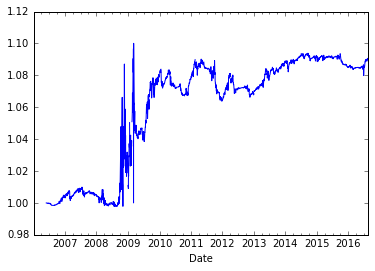

In [53]:
signal = trend_signal(returns,100,3)
#trade_friday = signal.resample('W-FRI').resample('B', fill_method='ffill')
trade_friday = signal.resample('W-FRI').mean().resample('B').ffill()
trade_rets = trade_friday.shift(1)*returns
to_index(trade_rets).plot()

In [54]:
vol = returns.rolling(window = 250, min_periods=200).std() * np.sqrt(250)

In [55]:
def sharpe(rets,ann=250):
    return rets.mean() / rets.std() *np.sqrt(ann)
cats = pd.qcut(vol, 4)
print('cats: %d, trade_rets: %d, vol: %d' % (len(cats), len(trade_rets), len(vol)))

cats: 2674, trade_rets: 2774, vol: 2674


In [56]:
trade_rets_fix = trade_rets.sample(len(cats))
### hehe i dont know why i should make this, but without same length,
### groupby wont work
trade_rets

Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-09         NaN
2006-01-10         NaN
                ...   
2016-08-12   -0.000082
2016-08-15    0.000234
2016-08-16   -0.000419
2016-08-17         NaN
2016-08-18         NaN
2016-08-19         NaN
Name: Adj Close, dtype: float64

In [57]:
trade_rets_fix.groupby(cats).agg(sharpe)

Adj Close
[0.0954, 0.116]    0.442842
(0.116, 0.166]    -0.034701
(0.166, 0.198]     0.505317
(0.198, 0.457]     0.188342
Name: Adj Close, dtype: float64

## examples

### Signal Frontier Analysis

In [58]:
names = ['AAPL', 'GOOG', 'MSFT', 'DELL', 'GS', 'MS', 'BAC', 'C']
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']
px = DataFrame({n: get_px(n,'1/1/2010','8/17/2016') for n in names})

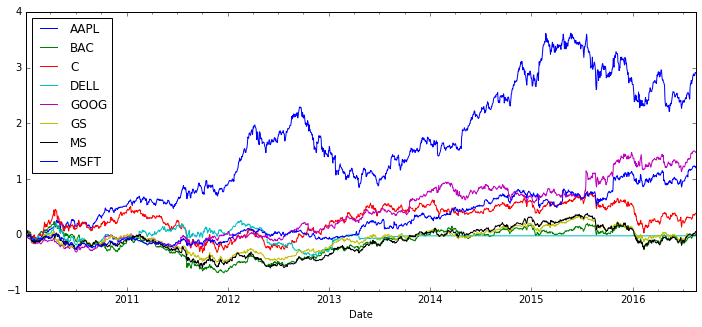

In [59]:
# plot it
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot(figsize=(12,5))

heatmap(ddf)

### Future contract rolling

In [60]:
import pandas_datareader.data as web
#import pandas.io.data as web
px = web.DataReader('SPY','yahoo')['Adj Close']*10
px


Date
2010-01-04     992.92299
2010-01-05     995.55135
2010-01-06     996.25228
2010-01-07    1000.45775
2010-01-08    1003.78704
2010-01-11    1005.18888
                 ...    
2016-08-09    2181.79993
2016-08-10    2176.39999
2016-08-11    2186.49994
2016-08-12    2184.60007
2016-08-15    2190.89996
2016-08-16    2179.60007
Name: Adj Close, dtype: float64

In [62]:
from datetime import datetime
expiry = {'ESU2' : datetime(2012,9,21),
         'ESZ2' : datetime(2012,12,21)}
expiry = Series(expiry).sort_values()
expiry

ESU2   2012-09-21
ESZ2   2012-12-21
dtype: datetime64[ns]

In [63]:
np.random.seed(12347)
N = 200
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25
walk = walk.cumsum()
rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')
near = np.concatenate([px.values, px.values[-1] + walk])
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices = DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)

In [64]:
prices.tail()

,ESU2,ESZ2
2017-02-22,2208.85007,2210.60007
2017-02-23,2195.10007,2197.35007
2017-02-24,2203.10007,2204.85007
2017-02-27,2219.60007,2218.85007
2017-02-28,2199.60007,2197.35007


In [65]:
def get_roll_weights(start, expiry, items, roll_periods=5):
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names
    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)
    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.ix[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                     periods=roll_periods + 1, freq='B')
            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.ix[roll_rng, item] = 1 - decay_weights
            weights.ix[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.ix[prev_date:, item] = 1
        prev_date = ex_date
        return weights

In [70]:
weights = get_roll_weights('6/1/2012', expiry, prices.columns)
weights.ix['2012-09-12':'2012-09-21']


,ESU2,ESZ2
2012-09-12,1.0,0.0
2012-09-13,1.0,0.0
2012-09-14,0.8,0.2
2012-09-17,0.6,0.4
2012-09-18,0.4,0.6
2012-09-19,0.2,0.8
2012-09-20,0.0,1.0
2012-09-21,0.0,0.0


In [71]:
rolled_returns = (prices.pct_change() * weights).sum(1)

### Rolling correlation and linear regression


In [72]:
aapl = web.get_data_yahoo('AAPL', '2000-01-01')['Adj Close']
msft = web.get_data_yahoo('MSFT', '2000-01-01')['Adj Close']
aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

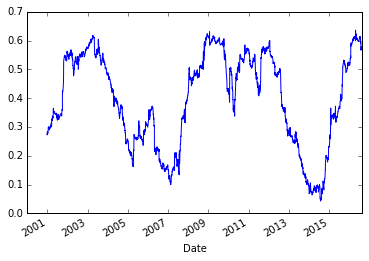

In [74]:
aapl_rets.rolling(window=250).corr(msft_rets).plot()

In [76]:
model = pd.ols(y=aapl_rets, x={'MSFT': msft_rets}, window=250)
model.beta

C:\Users\znsvs\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  if __name__ == '__main__':


,MSFT,intercept
Date,,
2000-12-28,0.429021,-0.002113
2000-12-29,0.421103,-0.001796
2001-01-02,0.420596,-0.001839
2001-01-03,0.433292,-0.001289
2001-01-04,0.432772,-0.001307
2001-01-05,0.431028,-0.001414
...,...,...
2016-08-09,0.575566,-0.000649
2016-08-10,0.575844,-0.000669


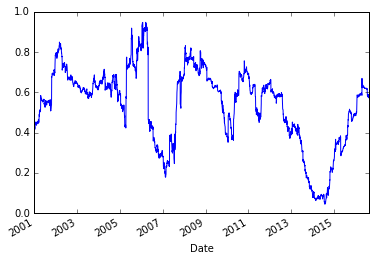

In [77]:
model.beta['MSFT'].plot()